# Nelder-Mead algorithm

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Nelder-Mead_Himmelblau.gif/435px-Nelder-Mead_Himmelblau.gif)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

---
The algorithm is implemented in the [NelderMead.py](./optimizers/NelderMead.py) file based on the description in [Wikipedia](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method)

---

In [26]:
from optimizers.NelderMead import NelderMead

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
Let's optimize the function
$$
f(x) = \sin(y)e^{(1 - \cos(x))^2} + \cos(x)e^{(1 - \sin(y))^2} + (x - y)^2
$$

---

In [30]:
def f(x):
    return np.sin(x[1]) * np.exp(np.power(1 - np.cos(x[0]), 2)) + \
           np.cos(x[0]) * np.exp(np.power(1 - np.sin(x[1]), 2)) + \
           np.power(x[0] - x[1], 2)

In [31]:
def plot_convergence(ax, f, start_x, label, alpha=1., gamma=2., rho=0.5, sigma=0.5):
    x, best, hist = NelderMead(f, start_x, alpha=alpha, gamma=gamma, rho=rho, sigma=sigma).optimize()
    print('{} -> {} with score {}'.format(start_x, x, best))

    n_iter = len(hist['x'])
    xs = np.zeros(n_iter)
    ys = np.zeros(n_iter)
    for i, x in enumerate(hist['x']):
        xs[i] = x[0]
        ys[i] = x[1]

    ax.plot(xs, ys, linewidth=3, label=label)
    ax.scatter(xs, ys, linewidth=3)

[0. 0.] -> [0.90552072 0.66526887] with score 1.4870191266698802
[5. 5.] -> [3.15307749 4.70108037] with score -106.76453391510206
[11.  0.] -> [13.47187422 13.23163636] with score 1.4870191268905106
[ 2. 11.] -> [ 3.19892426 10.9381897 ] with score -48.406017918684334
[ 7. 11.] -> [ 9.43612258 10.98422909] with score -106.76453674899719
[2.5 7. ] -> [3.14228516 4.69882813] with score -106.74831208046561


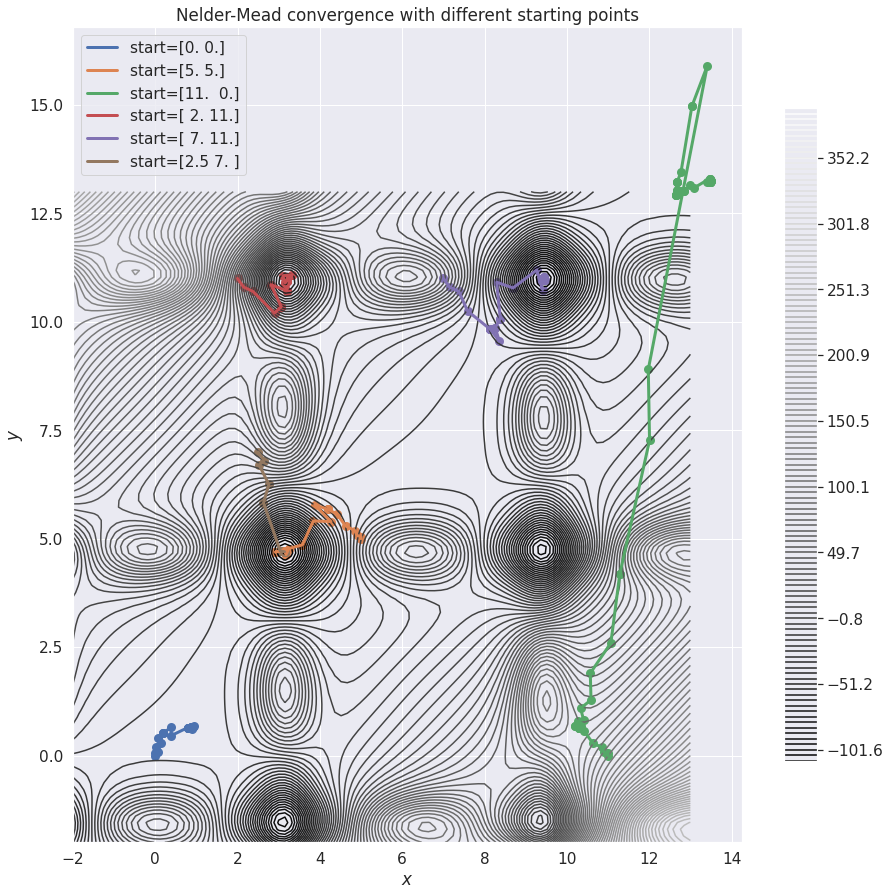

In [32]:
starts = [
    np.array([0.0, 0.0]),
    np.array([5.0, 5.0]),
    np.array([11.0, 0.0]),
    np.array([2.0, 11.0]),
    np.array([7.0, 11.0]),
    np.array([2.5, 7.0])
]

plt.figure(figsize=(15, 15))

for start in starts:
    plot_convergence(plt, f, start, 'start={}'.format(start))

plt.title('Nelder-Mead convergence with different starting points')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

A, B = np.meshgrid(np.linspace(-2, 13, 100), np.linspace(-2, 13, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        x = np.array([A[i, j], B[i, j]])
        levels[i, j] = f(x)

CS = plt.contour(A, B, levels, levels=np.linspace(0, 500, num=120)-110, cmap='gray')
CB = plt.colorbar(CS, shrink=0.8)

plt.legend()
plt.show()

[0. 7.] -> [3.15293515 4.70103982] with score -106.7645367462377
[0. 7.] -> [0.56194932 5.92133246] with score 33.65336775536054
[0. 7.] -> [2.77134741 4.00616153] with score -51.001540706425644


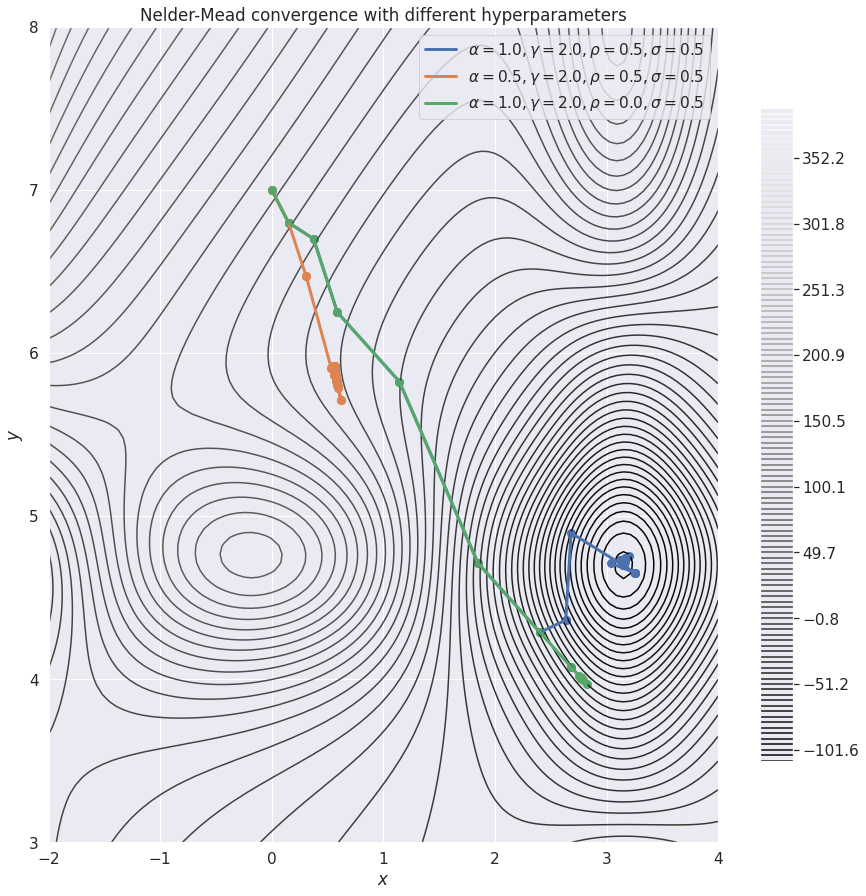

In [33]:
start_x = np.array([0., 7.])

hyperparams = [
    [1.0, 2.0, 0.5, 0.5],
    [0.5, 2.0, 0.5, 0.5],
    [1.0, 2.0, 0.0, 0.5],
]

plt.figure(figsize=(15, 15))

for h in hyperparams:
    label = r'$\alpha={}, \gamma={}, \rho={}, \sigma={}$'.format(h[0], h[1], h[2], h[3])
    plot_convergence(plt, f, start_x, label, h[0], h[1], h[2], h[3])

plt.title('Nelder-Mead convergence with different hyperparameters')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

A, B = np.meshgrid(np.linspace(-2, 4, 100), np.linspace(3, 8, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        x = np.array([A[i, j], B[i, j]])
        levels[i, j] = f(x)

CS = plt.contour(A, B, levels, levels=np.linspace(0, 500, num=120)-110, cmap='gray')
CB = plt.colorbar(CS, shrink=0.8)

plt.legend()
plt.show()